In [5]:
#Pour faire une régression linéaire multiple on va juste partir de celui linéaire 
# et juste utiliser une écriture matricielle et changer le contenu des matrices theta et X
#On doit d'abord importer la librairie d'où on va tirer nos fonctions

import numpy as np

#On va générer des données aléatoires(notre dataset) avec lesquelles travailler 
from sklearn.datasets import make_regression
#Pour faire des graphes
import matplotlib.pyplot as plt

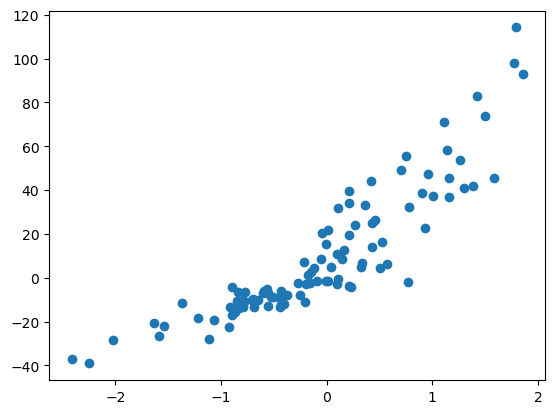

In [7]:
#**Dataset** avec un vecteur x et un vecteur y pour 100 exemples une feature x et du bruit
#mais dans ce cas-ci on va générer une dataset non-linéaire pour faire un truc
#polynomial en faisant une manipulation sur y
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)


#Représentation de y en fonction de x
plt.scatter(x, y )

In [8]:
#Là on voit que par rapport au 1er projet on a plus une courbe qu'une droite
#(polynome de degré 2 minimum 
#Mtnt On va vérifier les dimensions de nos matrices
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [9]:
#C'est normal que le vecteur y fourni par make regression n'ait pas de 
#dimensions bien définies; On va donc redimensionner y avec reshape
#et on va réutiliser sa dimension en x et puis définir celle en y à 1
y=y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [10]:
#Là on va dire que X est égal à lui-méme avec une colonne de xcarré à sa gauche
X= np.hstack((x, np.ones(x.shape))) 
X = np.hstack((x**2, X))
print(X.shape)
print(X)
# J'aurais pu mettre print X[:10] pour avoir les 10 premières lignes 
#que ça aille vite



(100, 3)
[[ 1.83935639e-05 -4.28877184e-03  1.00000000e+00]
 [ 1.10898791e-01  3.33014700e-01  1.00000000e+00]
 [ 2.21766080e-02  1.48918125e-01  1.00000000e+00]
 [ 5.07193732e+00 -2.25209621e+00  1.00000000e+00]
 [ 9.75371226e-03  9.87608843e-02  1.00000000e+00]
 [ 3.43616410e+00  1.85368932e+00  1.00000000e+00]
 [ 9.19928643e-01  9.59129107e-01  1.00000000e+00]
 [ 6.55875290e-02 -2.56100623e-01  1.00000000e+00]
 [ 2.28529923e-02 -1.51172062e-01  1.00000000e+00]
 [ 7.46481994e-01 -8.63991894e-01  1.00000000e+00]
 [ 1.87146680e-01  4.32604530e-01  1.00000000e+00]
 [ 2.80129088e-01 -5.29272225e-01  1.00000000e+00]
 [ 2.36508323e+00 -1.53788271e+00  1.00000000e+00]
 [ 2.11414097e-01  4.59797887e-01  1.00000000e+00]
 [ 4.70903724e-02 -2.17003162e-01  1.00000000e+00]
 [ 1.33938380e+00  1.15731750e+00  1.00000000e+00]
 [ 2.60391427e-01 -5.10285633e-01  1.00000000e+00]
 [ 2.25631799e-03 -4.75007157e-02  1.00000000e+00]
 [ 1.09379109e-04  1.04584468e-02  1.00000000e+00]
 [ 1.27898595e-01  3.5

In [11]:
#On va initialiser le vecteur theta de dimension 3,1 (a,b,c) à 3 au lieu de 2
#pour qui on doit donner des valeurs aléatoires
theta=np.random.randn(3, 1)
theta

array([[0.46822594],
       [2.861151  ],
       [1.00661657]])

In [12]:
#On va définir notre modèle qui est une fonction qui dépend des arguments X et theta
def model(X, theta):
    return X.dot(theta)
# instructions c'est juste produit entre X et theta

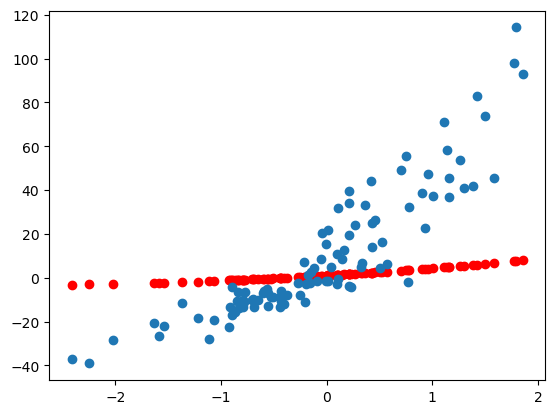

In [14]:
#On va comparer la droite de notre modèle avec la réalité soit les points 
plt.scatter(x, model(X, theta), c='r')
plt.scatter(x, y)

In [15]:
#On définit notre fonction cout
#m est le nombre d'exemples lié à la taille(length) de y
def cost_function(x, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [16]:
cost_function(X,y, theta)

414.80004246487664


On voit que notre fonction cout qui quantifie l'écart avec la courbe est énorme alors qu'elle doit étre minimale

GRADIENTS ET DESCENTE DE GRADIENTS

In [17]:
#On définit notre fonction gradient avec la formule de base le T veut dire transposée
#dot c'est multiplication S/O la formule des maths dans la partie algèbre linéaire
def grad(X, y , theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [28]:
n_iterations= 1000
learning_rate=0.02
#Fonction descente de gradients qui dépend aussi dun learning
#rate les pas qu'on fait pour descendre la vallée et trouver le point le plus bas
def gradient_descent(X,y, theta, learning_rate, n_iterations):
    cost_history =np.zeros(n_iterations)
#Algorithme itératif, on va répéter l'opération plusieurs fois en mettant à jour theta
#donc boucle for
    for i in range (0, n_iterations):
        theta = theta - learning_rate * grad(X,y, theta)
        cost_history[i]= cost_function(X, y, theta)

    return theta, cost_history

In [29]:
theta.shape

(3, 1)

In [30]:
n_iterations= 1000
learning_rate=0.01


theta_final, cost_history= gradient_descent(X, y, theta, learning_rate, n_iterations)
# theta final c'est celui après les calculs en gros
#Ne pas oublier que le learning rate doit etre ni trop petit 
#ni trop grand c'est à nous de le définir de manière un peu empirique

In [31]:
theta_final
#Là t'as ton thetafinal mais aussi la fonction cout qui sont affichés

array([[ 6.83767342],
       [31.06375709],
       [ 6.50725827]])

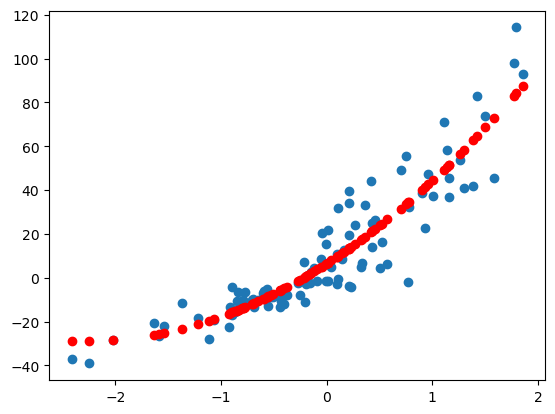

In [32]:
#En termes de dimension en tout cas on est carré
#On va voir si nos paramètres nous donnent de bons résultats en créant 
#une fonction qui va utiliser les paramètres de theta_final
#par rapport au premier projet on a mis des points plutot qu'une courbe
#pour éviter un truc chelou
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')


In [33]:
#On voit que notre droite est pas mal mais c'est possible de l'améliorer via
#le paramètres alpha(pas) ou le nombre d'itérations (crari on continue de calculer
#avec d'autres boucles for on va trouver un  nouveau minimum
#On va modifier notre learning rate et on aura un meilleur résultat que tu vas voir là 
#qui est presque parfait

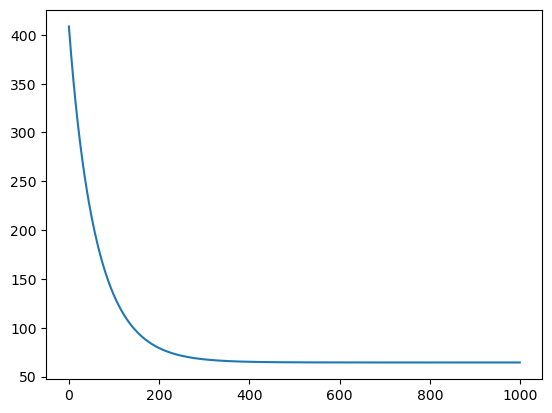

In [34]:
plt.plot(range(1000), cost_history)
#On a défini la valeur cost_history 
#qui nous montre l'évolution de la fonction cout au cours des 1000 itérations

In [35]:
#On voit au bout de 400 itérations que la fonction cout n'évolue presque plus

In [36]:
#On va maintenant voir le coefficient de détermination Rcarré qu'on affiche souvent sur excel
#Il évalue la performance du modèle de régression linéaire, 
#plus il est proche de 1 plus notre modèle rentre dans le nuage de points

#formule de R2 trouvable sur le site de machinelearnia.com
#ymean moyenne de y; sum() pour appliquer la somme sur ces termes

def coef_determination(y, predictions):
    #En général on la scinde en 2 variables u et v 
    u= ((y - predictions)**2).sum()
    v=((y - y.mean())**2).sum()
    return 1 - u/v

In [37]:
coef_determination(y, predictions)

0.8547495046559614